In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def dft(img):
    H, W, ch = img.shape
    
    G = np.zeros((H, W, ch), dtype=np.complex)
    x = np.arange(H).repeat(W).reshape(H, -1)
    y = np.tile(np.arange(W), (H, 1))
    for c in range(ch):
        for i in range(H):
            for j in range(W):
                G[i, j, c] = np.sum(img[..., c] * np.exp(-2j*np.pi*(i*x/H + j*y/W))) / np.sqrt(H*W)
                # for x in range(H):
                #     for y in range(W):
                #         G[i, j, c] += img[x, y, c] * np.exp(-2j*np.pi*(i*x/H + j*y/W))
    return G

In [3]:
def idft(G):
    H, W, ch = G.shape
    
    I = np.zeros((H, W, ch), dtype=np.float32)
    x = np.arange(H).repeat(W).reshape(H, -1)
    y = np.tile(np.arange(W), (H, 1))
    for c in range(ch):
        for i in range(H):
            for j in range(W):
                I[i, j, c] = np.abs(np.sum(G[..., c] * np.exp(2j*np.pi*(i*x/H + j*y/W)))) / np.sqrt(H*W)
    I = np.clip(I, 0, 255).astype("uint8")
    return I

In [6]:
def bpf(G, l_ratio=0.1, r_ratio=0.5):
    H, W, ch = G.shape
    G_p = np.zeros_like(G)
    G_p[0:H//2, 0:W//2] = G[H//2:H, W//2:W]
    G_p[0:H//2, W//2:W] = G[H//2:H, 0:W//2]
    G_p[H//2:H, 0:W//2] = G[0:H//2, W//2:W]
    G_p[H//2:H, W//2:W] = G[0:H//2, 0:W//2]
    
    x = np.arange(H).repeat(W).reshape(H, -1) # [0, 0, ..., 0], [1, 1, ..., 1], ...
    y = np.tile(np.arange(W), (H, 1)) # [0, 1, ..., W-1] が H 行並ぶ
    
    x_p = x - H // 2
    y_p = y - W // 2
    r = np.sqrt(x_p**2 + y_p**2)
    mask = np.ones((H, W), dtype=np.float32)
    mask[r < (W // 2 * l_ratio)] = 0
    mask[(W // 2 * r_ratio) < r] = 0
    mask = np.repeat(mask, ch).reshape(H, W, ch)

    G_p *= mask;
    
    G[0:H//2, 0:W//2] = G_p[H//2:H, W//2:W]
    G[0:H//2, W//2:W] = G_p[H//2:H, 0:W//2]
    G[H//2:H, 0:W//2] = G_p[0:H//2, W//2:W]
    G[H//2:H, W//2:W] = G_p[0:H//2, 0:W//2]
    return G

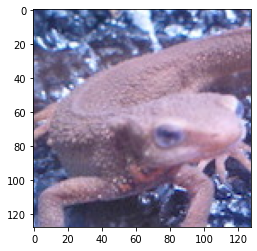

In [7]:
img = cv2.imread("../imori.jpg")
H, W, ch = img.shape
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

G = dft(img)
G = bpf(G)
output_img = idft(G)

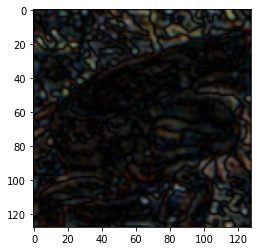

In [8]:
plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.show()